# Digit

## Setup

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

dataObj = load_digits()
X = dataObj.data
y = dataObj.target
colsX = dataObj.feature_names
df = pd.DataFrame(X, columns=colsX)
print(df.shape)
display(df.head())

(1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


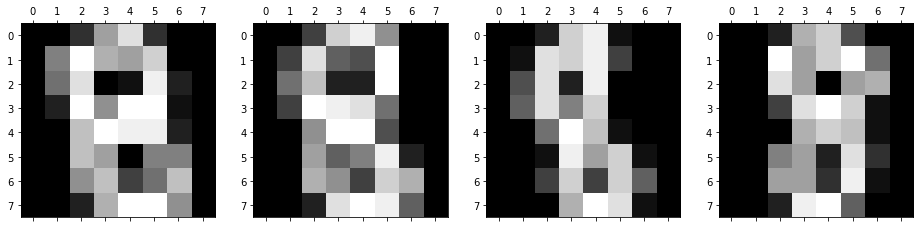

In [3]:
digit = 8
num_fig = 4

# Get index 
idxs = (y == digit).nonzero()[0]

# Get random sample
idxs_rand = np.random.choice(idxs,num_fig)

# Plot
fig, axs = plt.subplots(1, num_fig, figsize=(4*num_fig,4))
plt.gray()
for n, idx in enumerate(idxs_rand):
    axs[n].matshow(X[idx,:].reshape(8,8))

# Dimensionality reduction with PCA

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

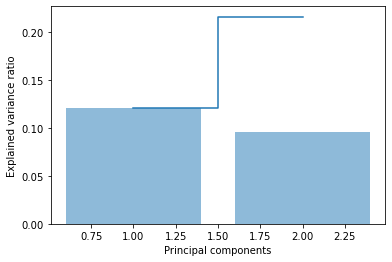

In [5]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_std)
X_std_pca = pca.transform(X_std)

plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

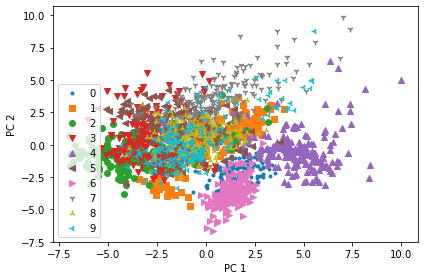

In [6]:
import seaborn as sns
from matplotlib.lines import Line2D

colors = sns.color_palette("tab10",len(np.unique(y)))
markers = [k for k in Line2D.markers.keys()][:len(np.unique(y))]

fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_pca[y == l, 0], X_std_pca[y == l, 1], color=c, label=l, marker=m)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend(loc="lower left")
plt.tight_layout()

# Dimensionality reduction with LDA

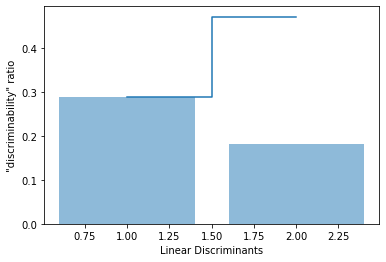

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n_components = 2
lda = LDA(n_components=n_components)
lda.fit(X_std, y)
X_std_lda = lda.transform(X_std)

plt.bar(range(1, 3), lda.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 3), np.cumsum(lda.explained_variance_ratio_), where='mid')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.show()


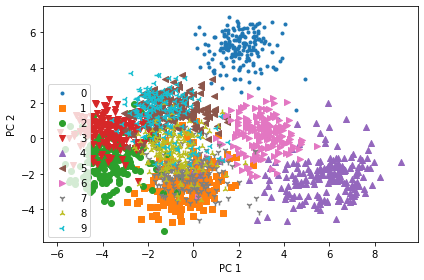

In [8]:
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_lda[y == l, 0], X_std_lda[y == l, 1], color=c, label=l, marker=m)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend(loc="lower left")
plt.tight_layout()

# Dimensionality reduction with KPCA

In [9]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
X_std_kpca = scikit_kpca.fit_transform(X_std)


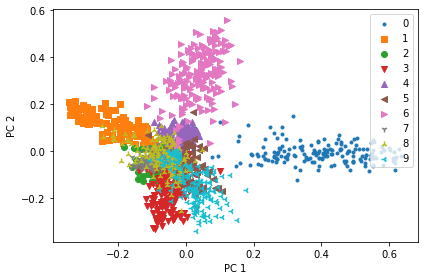

In [10]:
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_kpca[y == l, 0], X_std_kpca[y == l, 1], color=c, label=l, marker=m)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend()
plt.tight_layout()

# Visualization with TSNE

In [11]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=n_components, perplexity=3)
X_std_tsne = tsne.fit_transform(X_std)

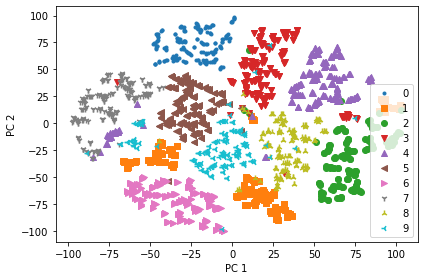

In [12]:
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_tsne[y == l, 0], X_std_tsne[y == l, 1], color=c, label=l, marker=m)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend()
plt.tight_layout()

# Dimensionality reduction with UMAP

In [17]:
from umap import UMAP 
umap = UMAP(n_neighbors=15, min_dist=0.2)
X_std_umap = umap.fit_transform(X_std)

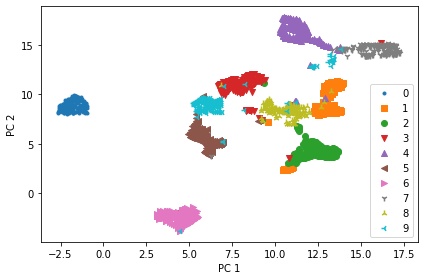

In [18]:
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_umap[y == l, 0], X_std_umap[y == l, 1], color=c, label=l, marker=m)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend()
plt.tight_layout()